In [29]:
import numpy as np
from hetdex_api.shot import get_fibers_table
from hetdex_api.detections import Detections
import matplotlib.pyplot as plt

In [30]:
%matplotlib inline

## An example satellite shot, will only select 1 IFU for quicker access

In [32]:
shotid = 20230110008
ifuslot = '085'

In [33]:
# To access the default mask which will be a bool type value for every spectral element

In [34]:
fib = get_fibers_table(shotid, ifuslot=ifuslot, survey='hdr5', add_mask=True)

Text(0, 0.5, 'fiber dimension --->')

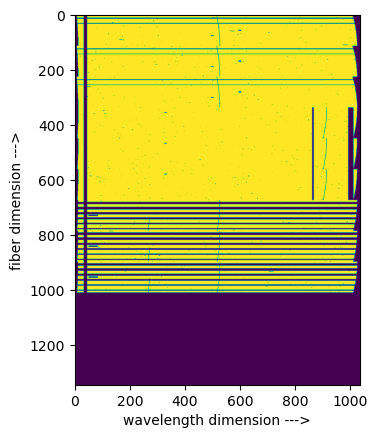

In [35]:
# mask is just True/1s (good) and False/0s (bad)
plt.imshow(fib['mask'])
plt.xlabel('wavelength dimension --->')
plt.ylabel('fiber dimension --->')

## Single Mask Example

In [36]:
## If I only want the fibers which have a satellite going through them for example
fib = get_fibers_table(shotid , ifuslot=ifuslot, survey='hdr5', add_mask=True, mask_options=['sat'])

Text(0, 0.5, 'fiber dimension --->')

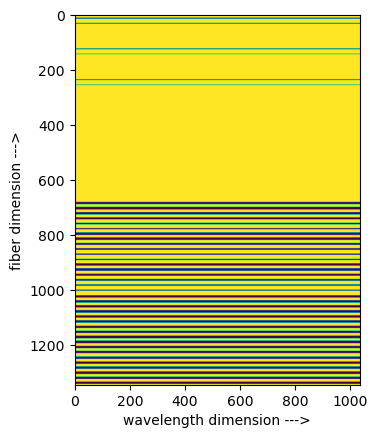

In [37]:
# mask is just True/1s (good) and False/0s (bad), here bad = satellite going through it
plt.imshow(fib['mask'])
plt.xlabel('wavelength dimension --->')
plt.ylabel('fiber dimension --->')

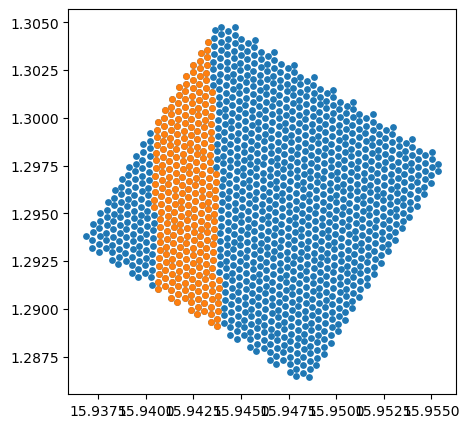

In [38]:
# to see the mask in positional space
sat_mask = np.any( fib['mask'], axis=1)
plt.figure(figsize=(5,5))
plt.scatter( fib['ra'], fib['dec'], s=15, label='all fibers')
plt.scatter( fib['ra'][sat_mask==False], fib['dec'][sat_mask==False], s=15, label='satellite fibers' )

## To access the full bitmask

In [55]:
from astropy.nddata import bitmask
from astropy.nddata.bitmask import BitFlagNameMap

In [56]:
from hetdex_api.shot import CALFIB_DQ

In [57]:
# get mask name dictionary                                                                      
mask_names = []
for i in CALFIB_DQ.__dict__.keys():
    if '_' not in i:
        mask_names.append(i)

print(mask_names)

['MAIN', 'FTF', 'CHI2FIB', 'BADPIX', 'BADAMP', 'LARGEGAL', 'METEOR', 'BADSHOT', 'THROUGHPUT', 'BADFIB', 'SAT']


In [58]:
fib = get_fibers_table(shotid , ifuslot=ifuslot, survey='hdr5', add_mask=True, mask_options='bitmask')

In [59]:
# each spectral element contains an integer which is the sum of all the bitmask values for that value

Text(0, 0.5, 'fiber dimension --->')

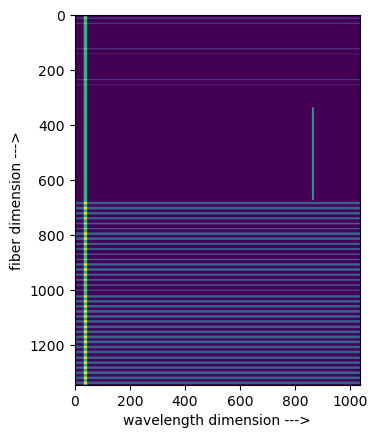

In [62]:
plt.imshow(fib['mask'])
plt.xlabel('wavelength dimension --->')
plt.ylabel('fiber dimension --->')

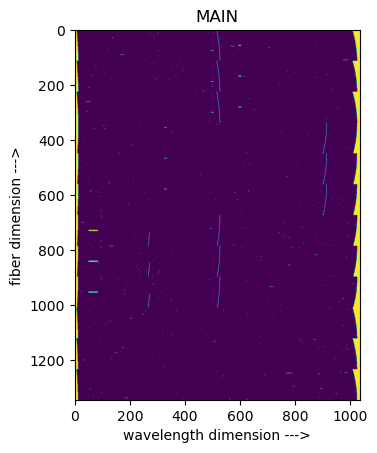

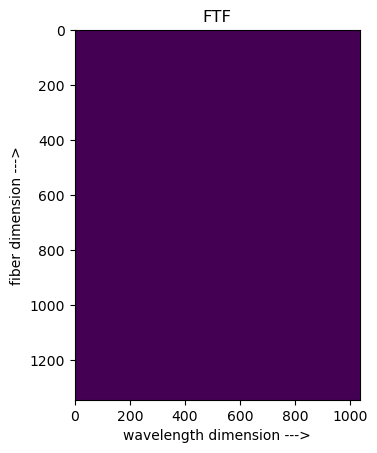

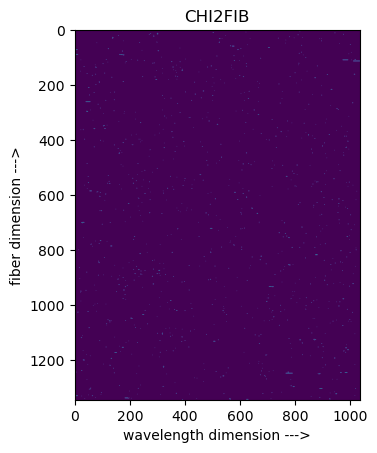

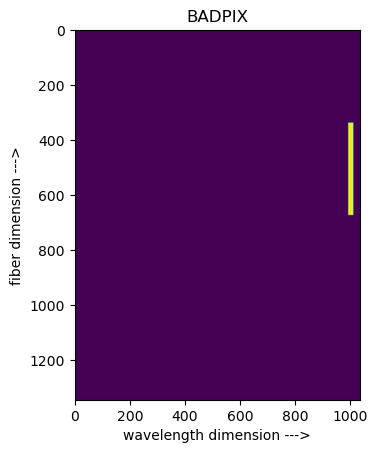

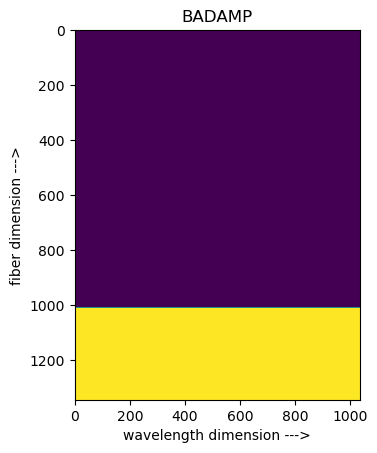

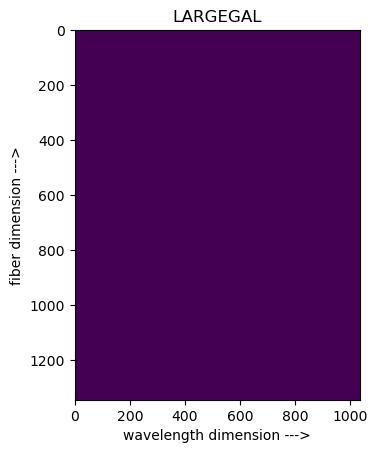

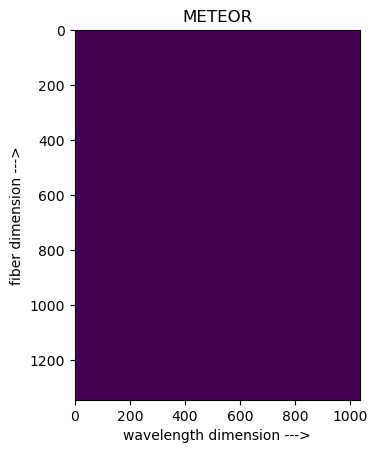

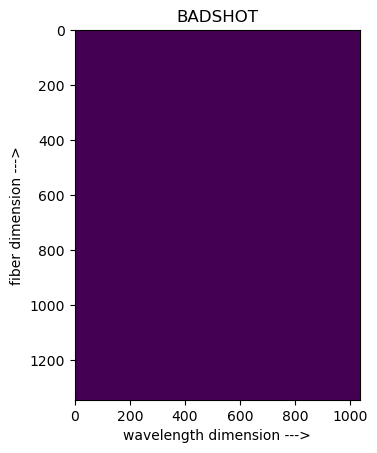

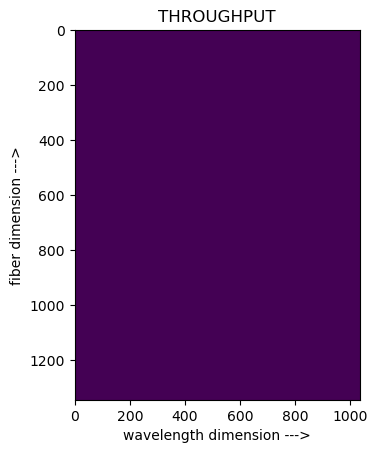

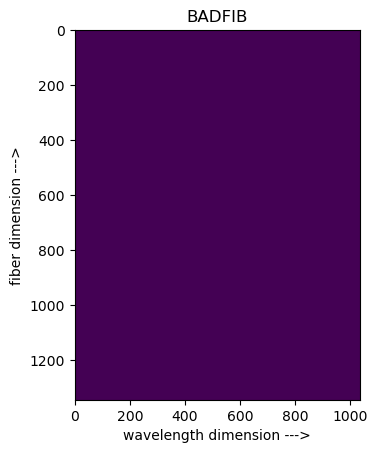

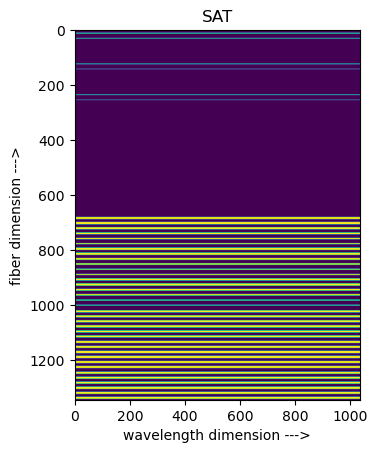

In [65]:
# with labels
bitmaskDQ = fib['mask']

for mask_name in mask_names:
    plt.figure()
    plt.title(mask_name)
    bool_mask = (CALFIB_DQ[mask_name] & bitmaskDQ)
    plt.imshow(bool_mask)
    plt.xlabel('wavelength dimension --->')
    plt.ylabel('fiber dimension --->')